### 1、Import tensorflow and use tensorflow to define a constant.

In [7]:
import tensorflow as tf
const = tf.constant('const')
const

done


<tf.Tensor: shape=(), dtype=string, numpy=b'const'>

### 2、Use tensorflow to print 'Welcome to Huawei'.

In [8]:
tf.print('Welcome to Huawei')

Welcome to Huawei


### 3、Use tensorflow to define two numeric constants,then calculate them and print the result.

In [10]:
a = tf.constant(1)
b = tf.constant(2)
tf.print(tf.add(a,b))

3


### 4、Randomly generate two matrices using tensorflow, calculate and print the result of their multiplication.

In [27]:
a = tf.random.normal([3,2], 0, 10)
b = tf.random.normal([2,3], 0, 10)
tf.matmul(a,b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-33.10585  ,   8.709821 , -95.64319  ],
       [113.17927  ,  -1.9206104,  16.00312  ],
       [-60.99419  , -21.641949 , 244.53488  ]], dtype=float32)>

### 5、Try to use your own handwriting number to do image recognition

In [10]:
import cv2 as cv
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import time
import cv2
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


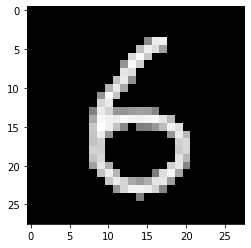

(1, 784)

In [11]:
def make_label(label_num):
    label = np.zeros((1,10),dtype='float32')
    label[:,label_num] = 1.0
    return label

label_test = make_label(6)
# the path of image
img_path = "data\\self_data\\6.jpg"
img_file = cv2.imread(img_path)
img_file = cv2.cvtColor(img_file, cv2.COLOR_RGB2GRAY)
img_file = 255 - img_file
for row in range(img_file.shape[0]):
    for col in range(img_file.shape[1]):
        if img_file[row][col] < 120.0:
            img_file[row][col] = 0
plt.imshow(img_file,'gray')
plt.show()
data_test = img_file / 255
data_test = np.float32(img_file.reshape(1, 28*28))
data_test.shape

In [12]:
input_num = 784
h1_num = 512
epochs = 3000
batch_num = 1000
lr = 0.09
W1 = tf.Variable(tf.truncated_normal([input_num, h1_num],stddev=0.1))
W2 = tf.Variable(tf.zeros([h1_num,10]))
B1 = tf.Variable(tf.zeros([h1_num]))
B2 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32, [None, input_num])
keep_prob = tf.placeholder(tf.float32)
label = tf.placeholder(tf.float32, [None,10])

hidden1 = tf.nn.relu(tf.matmul(x,W1) + B1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_drop, W2) + B2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(label * tf.log(y), reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(lr).minimize(cross_entropy)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
with tf.Session() as sess:
    start = time.time()
    tf.global_variables_initializer().run()
    for epoch in range(epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_num)
        _,cost = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, label: batch_ys, keep_prob:0.75})
        if epoch % 100 == 0:
            print("epoch: {}, loss: {:.2f}".format(epoch, cost))
        
    stop = time.time()
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(label,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    predict_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, label: mnist.test.labels, keep_prob:1.0})
    print("The accuracy of the test data：{:.2f}%".format(predict_acc * 100))
    print("The total time：{:.2f}s".format(stop-start))
    test_acc,test_value = sess.run([accuracy,y], feed_dict={x:data_test, label:label_test, keep_prob:1.0})
    print("The accuracy of you:{:.2f}%".format(test_acc * 100))

AttributeError: module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' has no attribute 'train'

In [ ]:
print("The prediction by AI is{}".format(list(test_value[0]).index(test_value[0].max())))